<a href="https://colab.research.google.com/github/Chhavidotcom/youtube-data-analysis/blob/main/Untitled23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Youtube_Explore_DA**

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [51]:
link = 'https://drive.google.com/file/d/1lzm1h3HdJjJ0KHXFTuvv8UP3FCYPnmIG/view'

import pandas as pd

# to get the id part of the file
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('commentsGB.csv')


In [52]:
df = pd.read_csv('commentsGB.csv',error_bad_lines=False)
print(df)


b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


           video_id  ... replies
0       jt2OHQh0HoQ  ...       0
1       jt2OHQh0HoQ  ...       0
2       jt2OHQh0HoQ  ...       0
3       jt2OHQh0HoQ  ...       0
4       jt2OHQh0HoQ  ...       0
...             ...  ...     ...
718447  lLN1FwiqGwc  ...       0
718448  lLN1FwiqGwc  ...       0
718449  lLN1FwiqGwc  ...       0
718450  lLN1FwiqGwc  ...       0
718451  lLN1FwiqGwc  ...       0

[718452 rows x 4 columns]


In [53]:
from textblob import TextBlob

In [54]:
TextBlob('Its more accurate to call it the M+ (1000) be..').sentiment.polarity

0.45000000000000007

In [55]:
df.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [56]:
df.dropna(inplace=True)

In [57]:
polarity=[] # list which will contain the polarity of the comments

for i in df['comment_text']:
    polarity.append(TextBlob(i).sentiment.polarity)

In [58]:
df['polarity']=polarity

In [59]:
df.head(20)

video_id  ...  polarity
0   jt2OHQh0HoQ  ...  0.450000
1   jt2OHQh0HoQ  ...  0.000000
2   jt2OHQh0HoQ  ...  0.000000
3   jt2OHQh0HoQ  ...  0.000000
4   jt2OHQh0HoQ  ...  1.000000
5   jt2OHQh0HoQ  ...  0.300000
6   jt2OHQh0HoQ  ...  0.000000
7   jt2OHQh0HoQ  ... -0.100000
8   jt2OHQh0HoQ  ...  0.028571
9   jt2OHQh0HoQ  ...  0.500000
10  jt2OHQh0HoQ  ...  0.500000
11  jt2OHQh0HoQ  ...  0.000000
12  jt2OHQh0HoQ  ...  0.300000
13  jt2OHQh0HoQ  ...  0.026563
14  jt2OHQh0HoQ  ...  0.500000
15  jt2OHQh0HoQ  ...  0.500000
16  jt2OHQh0HoQ  ...  0.200000
17  jt2OHQh0HoQ  ...  0.250000
18  jt2OHQh0HoQ  ...  0.500000
19  jt2OHQh0HoQ  ...  0.300000

[20 rows x 5 columns]

# Lets perform EDA for the Positve sentences

In [60]:
comments_positive=df[df['polarity']==1]

In [61]:
comments_positive.shape

(20400, 5)

In [62]:
comments_positive.head()

video_id  ... polarity
4    jt2OHQh0HoQ  ...      1.0
26   jt2OHQh0HoQ  ...      1.0
80   jt2OHQh0HoQ  ...      1.0
158  YPVcg45W0z4  ...      1.0
175  YPVcg45W0z4  ...      1.0

[5 rows x 5 columns]

In [63]:
from wordcloud import WordCloud,STOPWORDS

In [64]:
stopwords=set(STOPWORDS)

In [65]:
total_comments=' '.join(comments_positive['comment_text'])

In [66]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

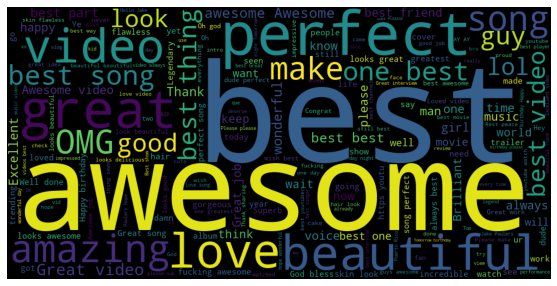

In [67]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

Its time to go for negative sentences

In [68]:
comments_negative=df[df['polarity']==-1]

In [69]:
total_comments=' '.join(comments_negative['comment_text'])

In [70]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

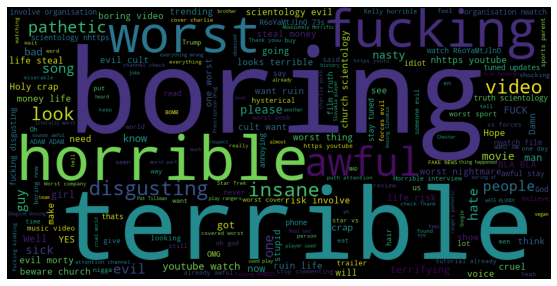

In [71]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

### Analysing Tags column,what are trending tags on youtube

In [72]:
link = 'https://drive.google.com/file/d/1NXufaZgu-eiEqe9z5uhiByZNLbKOV2sE/view'

import pandas as pd

# to get the id part of the file
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('USvideos.csv')



In [73]:
videos = pd.read_csv('USvideos.csv',error_bad_lines=False)
print(videos)


         video_id  ...   date
0     XpVt6Z1Gjjo  ...  13.09
1     K4wEI5zhHB0  ...  13.09
2     cLdxuaxaQwc  ...  13.09
3     WYYvHb03Eog  ...  13.09
4     sjlHnJvXdQs  ...  13.09
...           ...  ...    ...
7987  xlu6i6lT_vk  ...  22.10
7988  qRoVlH1OcI4  ...  22.10
7989  EoejGgUNmVU  ...  22.10
7990  MT1CMTI0EVw  ...  22.10
7991  AFxLA3RGjnc  ...  22.10

[7992 rows x 11 columns]


b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [74]:
tags_complete=' '.join(videos['tags'])

In [75]:
tags_complete

"logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 life Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lighting|A11 Bionic|augmented reality|emoji|animoji|Face ID|Apple Pay|camera|smartphone [none] apple iphone x hands on|Apple iPhone X|iPhone X|apple iphone x first look|iPhone X first look|apple iphone x event 2017|apple iphone x event|iPhone X price|iPhone X specs|iPhone X design|iPhone X camera|iPhone X home button|iPhone X wireless charging|iPhone X waterproof|iPhone X release date|iphone 2017|apple|iphone|ios 11|the verge|verge jacksfilms|parody|parodies|iphone|iphone x|iphone 8|apple|emoji a24|a24 films|a24 trailers|independent films|trailer|HD|official|movie|film|a24 movies|oscar 

In [76]:
import re

In [77]:
tags=re.sub('[^a-zA-Z]',' ',tags_complete)

In [78]:
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button   M subscribers logan paul   year vlogging   year vlog dwarf mamba play button logan paul history youtube history   M   M plaque youtube button diamond button logang logang   life Apple iPhone    iPhone Ten iPhone Portrait Lighting A   Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone  none  apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event      apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone      apple iphone ios    the verge verge jacksfilms parody parodies iphone iphone x iphone   apple emoji a   a   films a   trailers independent films trailer HD official movie film a   movies oscar 

In [79]:
tags=re.sub(' +',' ',tags)

In [80]:
wordcloud=WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(tags)

(-0.5, 999.5, 499.5, -0.5)

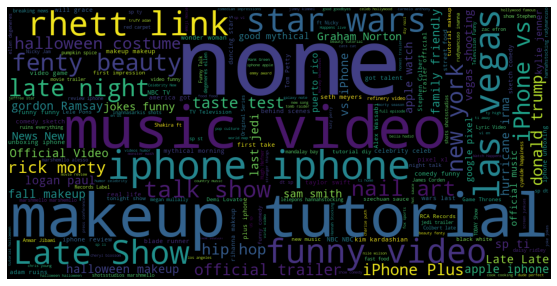

In [81]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

#### Lets find out the relation among continuous variables
#### As quite obvious the number of likes have very strong relation with views

Text(0.5, 1.0, 'Regression plot for views & likes')

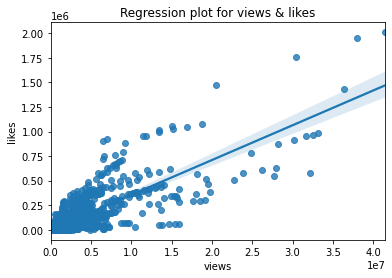

In [82]:
sns.regplot(data=videos,x='views',y='likes')
plt.title('Regression plot for views & likes')

#### dislikes vs views Analysis

Text(0.5, 1.0, 'Regression plot for views & dislikes')

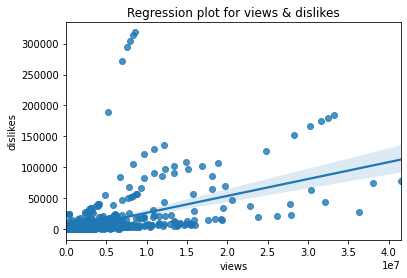

In [83]:
sns.regplot(data=videos,x='views',y='dislikes')
plt.title('Regression plot for views & dislikes')

#### Correlation matrix is the evidence of above analysis!

In [84]:
df_corr=videos[['views','likes','dislikes']]

In [85]:
df_corr.corr()

views     likes  dislikes
views     1.000000  0.832844  0.541955
likes     0.832844  1.000000  0.497439
dislikes  0.541955  0.497439  1.000000

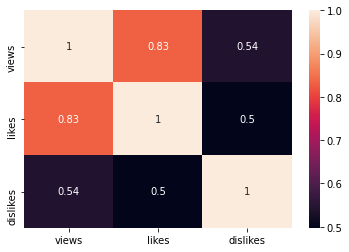

In [86]:
sns.heatmap(df_corr.corr(),annot=True)